# (a small) Toolbox for visualising data in Python

## 0. Jupyter notebooks

The **Jupyter Notebook** is an open-source web application that allows you to create and share documents that contain *live code*, *equations*, *visualizations* and *narrative text*. 

Uses include: *data cleaning* and transformation, *numerical simulation*, *statistical modeling*, *data visualization*, *machine learning*, and much more.

## 1. Pandas 

In [1]:
import pandas as pd

In [2]:
box_office_data = pd.read_csv('tmdb_box_office_prediction_train_clean.csv', 
                              index_col=0)

In [3]:
box_office_data.head()

,id,imdb_id,title,runtime,release_date,release_year,release_decade,release_season,budget,popularity,status,revenue
0,1,tt2637294,Hot Tub Time Machine 2,93.0,2015-02-20,2015,2010,Winter,14000000,6.575393,Released,12314651
1,2,tt0368933,The Princess Diaries 2: Royal Engagement,113.0,2004-08-06,2004,2000,Summer,40000000,8.248895,Released,95149435
2,3,tt2582802,Whiplash,105.0,2014-10-10,2014,2010,Autumn,3300000,64.299990,Released,13092000
3,4,tt1821480,Kahaani,122.0,2012-03-09,2012,2010,Spring,1200000,3.174936,Released,16000000
4,5,tt1380152,Marine Boy,118.0,2009-02-05,2009,2000,Winter,0,1.148070,Released,3923970


#### Summary statistics of continuous variables:

In [4]:
box_office_data[['budget', 'revenue', 'popularity']].describe()

,budget,revenue,popularity
count,3.000000e+03,3.000000e+03,3000.000000
mean,2.253133e+07,6.672585e+07,8.463274
std,3.702609e+07,1.375323e+08,12.104000
min,0.000000e+00,1.000000e+00,0.000001
25%,0.000000e+00,2.379808e+06,4.018053
50%,8.000000e+06,1.680707e+07,7.374861
75%,2.900000e+07,6.891920e+07,10.890983
max,3.800000e+08,1.519558e+09,294.337037


#### What are the oldest and newest movies in the dataset?

In [5]:
box_office_data.sort_values("release_date").head()

,id,imdb_id,title,runtime,release_date,release_year,release_decade,release_season,budget,popularity,status,revenue
1763,1764,tt0012349,The Kid,68.0,1921-01-21,1921,1920,Winter,250000,8.168456,Released,2500000
2992,2993,tt0015400,The Thief of Bagdad,149.0,1924-03-18,1924,1920,Spring,1135654,3.878515,Released,1213880
1917,1918,tt0016104,The Merry Widow,137.0,1925-08-26,1925,1920,Summer,592,0.286719,Released,1
1361,1362,tt0015648,Battleship Potemkin,75.0,1925-12-24,1925,1920,Winter,0,12.912845,Released,45100
2680,2681,tt0017423,Sparrows,84.0,1926-05-14,1926,1920,Spring,463455,0.445526,Released,966878


In [6]:
box_office_data.sort_values("release_date").tail()

,id,imdb_id,title,runtime,release_date,release_year,release_decade,release_season,budget,popularity,status,revenue
2838,2839,tt5592248,The Beguiled,93.0,2017-06-23,2017,2010,Summer,10500000,36.260510,Released,25442939
1695,1696,tt3890160,Baby Driver,113.0,2017-06-28,2017,2010,Summer,34000000,228.032744,Released,224511319
1354,1355,tt1131724,2:22,99.0,2017-06-29,2017,2010,Summer,0,37.484577,Released,422
1715,1716,tt3450958,War for the Planet of the Apes,140.0,2017-07-11,2017,2010,Summer,152000000,146.161786,Released,369907963
2623,2624,tt2239822,Valerian and the City of a Thousand Planets,137.0,2017-07-20,2017,2010,Summer,197471676,15.262706,Released,90024292


#### Which movie made had the highest revenue?

In [7]:
def display_cover_url(row, full_size=False):
    
    from imdb import IMDb
    from IPython.display import Image
    from IPython.core.display import HTML
    
    ia = IMDb()
    imdb_id = row.imdb_id[2:]
    movie = ia.get_movie(imdb_id)
    
    url = movie['cover url']
    
    if full_size:
        url = movie['full-size cover url']
    
    display(Image(url))

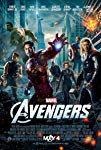

In [8]:
display_cover_url(box_office_data.sort_values("revenue", ascending=False).reset_index().loc[0])

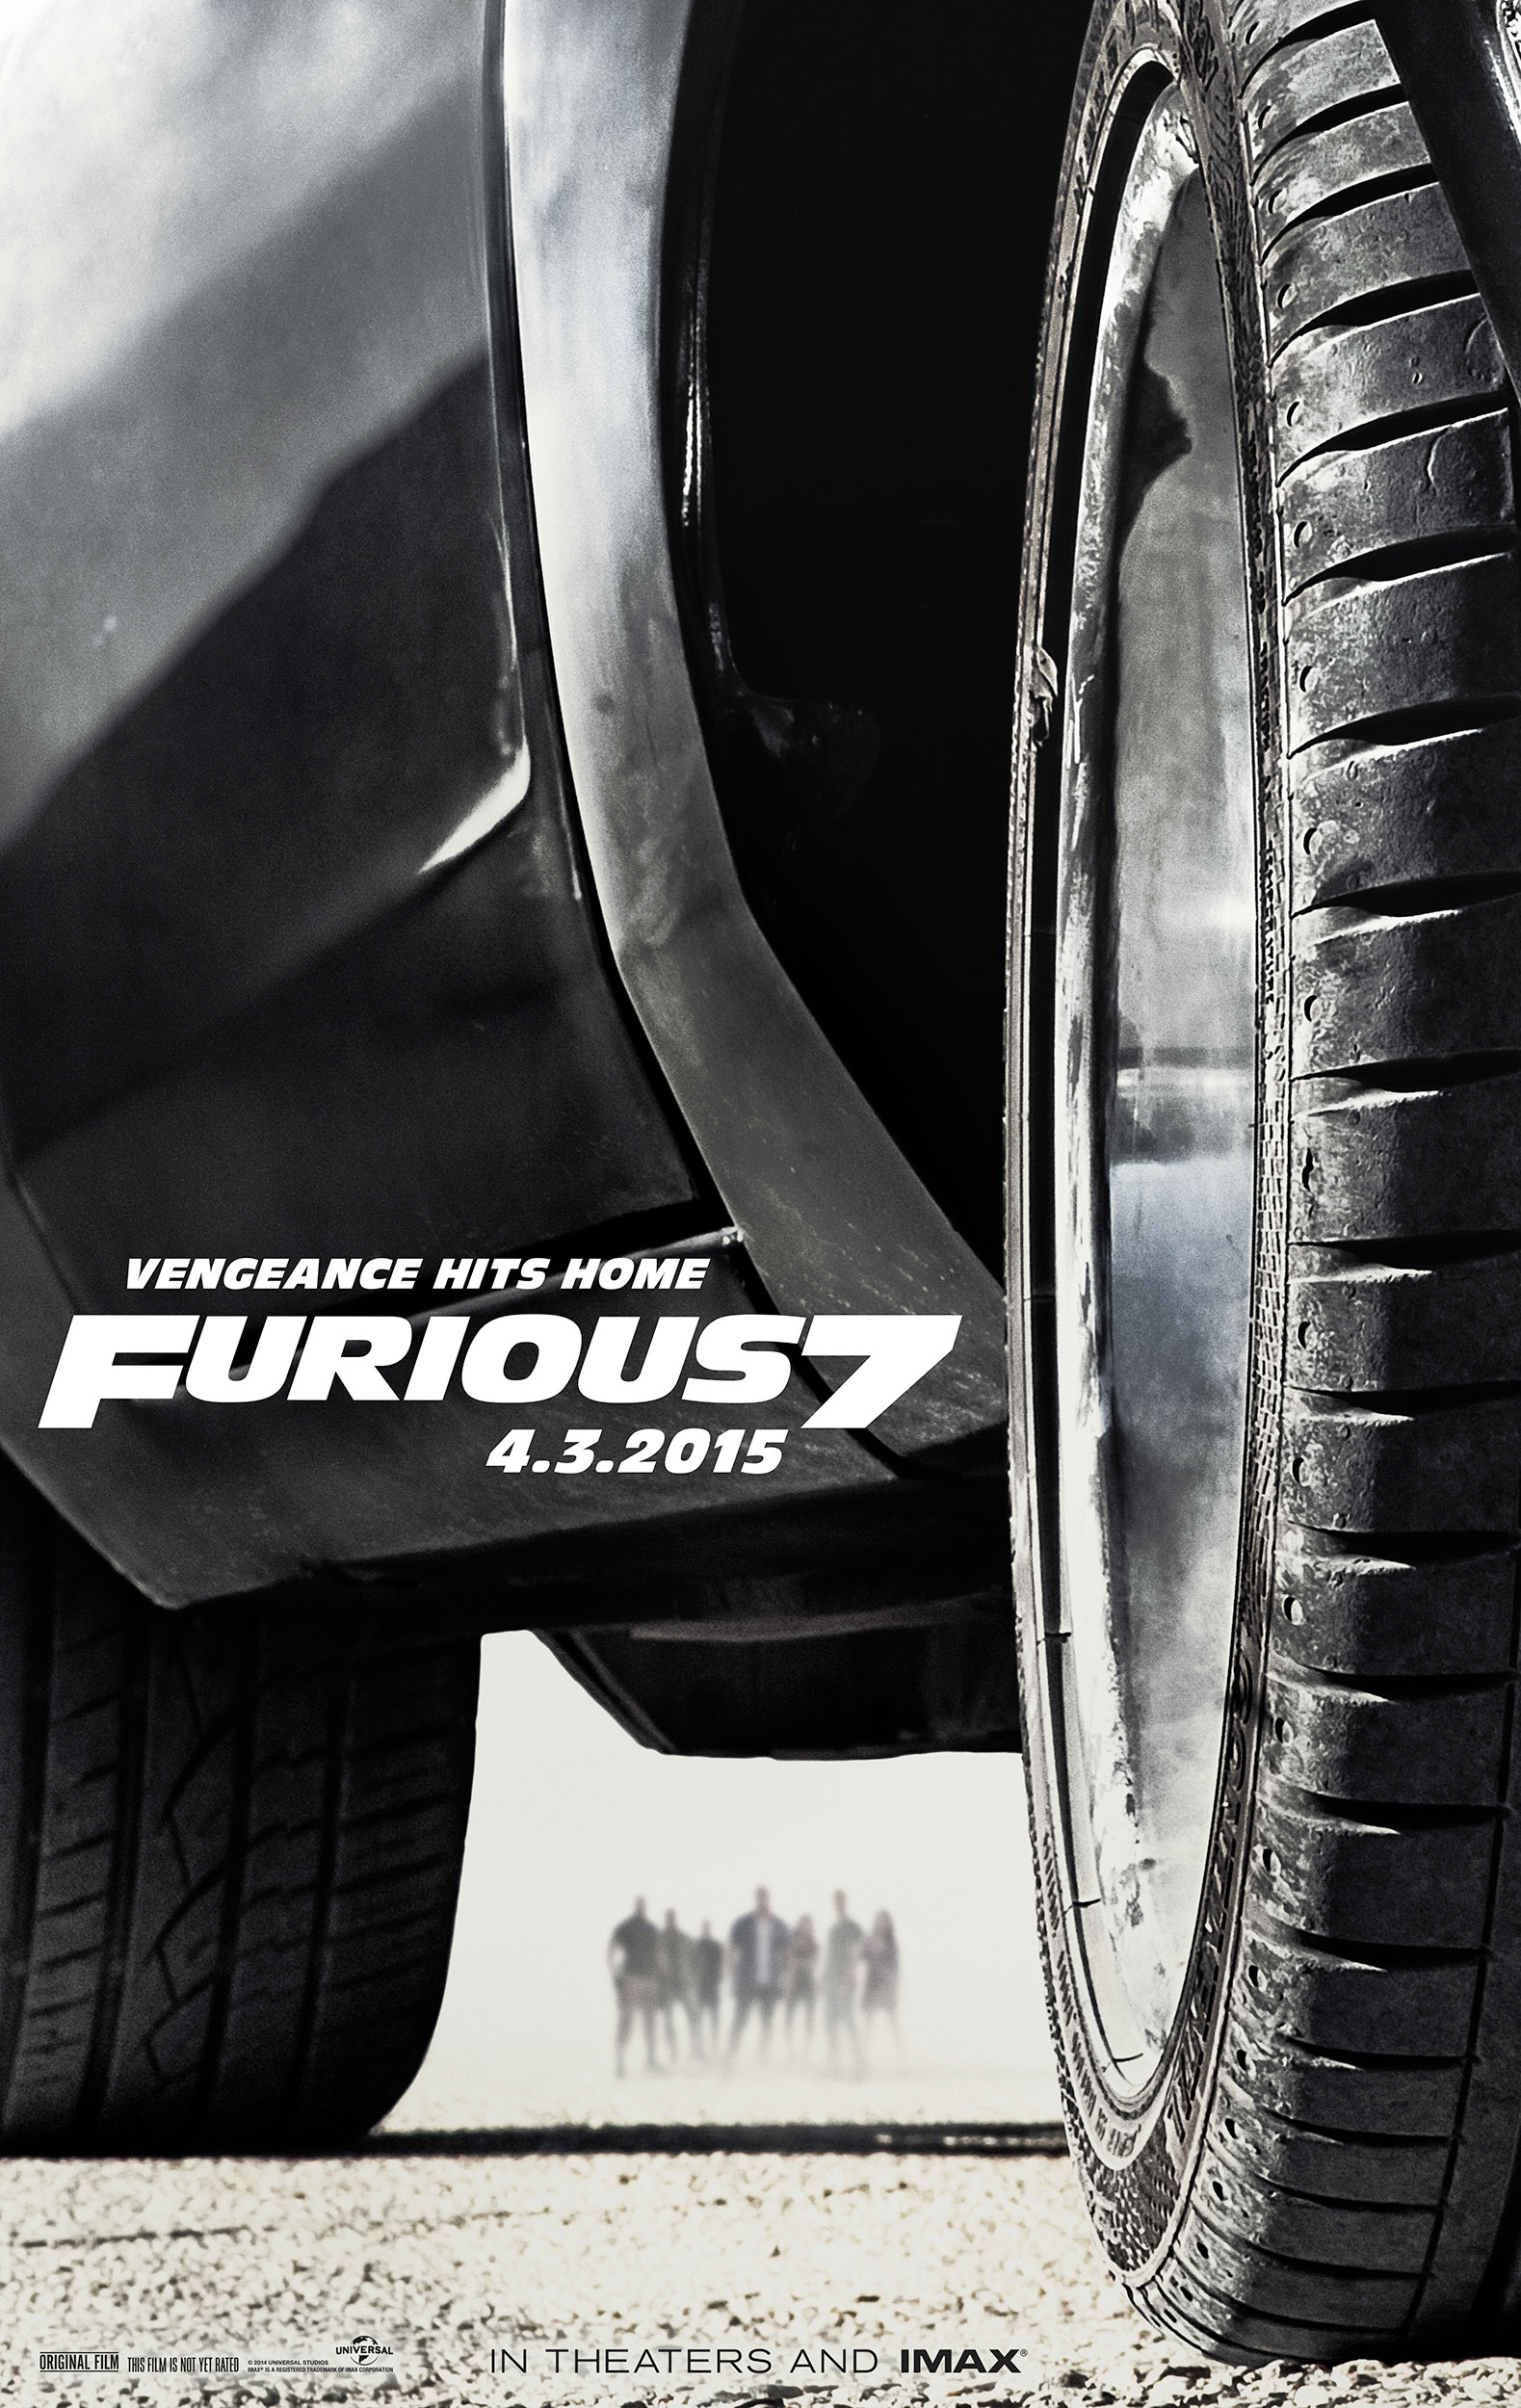

In [9]:
display_cover_url(box_office_data.sort_values("revenue", ascending=False).reset_index().loc[1], 
                  full_size=True)

#### Did the mean budget change throughout the decades?

In [10]:
box_office_data.groupby("release_decade").mean()[['budget']]

,budget
release_decade,
1920,2.881804e+05
1930,7.694655e+05
1940,1.138492e+06
1950,2.247583e+06
1960,5.512374e+06
1970,4.585681e+06
1980,7.872791e+06
1990,2.172549e+07
2000,2.915482e+07


#### Which actors participated in the most movies with high revenue?

In [11]:
cast_data = pd.read_csv('tmdb_box_office_prediction_train_clean_cast.csv', 
                        index_col=0)
crew_data = pd.read_csv('tmdb_box_office_prediction_train_clean_crew.csv', 
                        index_col=0)

In [12]:
cast_data.head()

,cast_id,gender_actor,id_actor,id,name_actor,order_actor,gender_actor_label
0,4.0,1.0,52997.0,1,Rob Corddry,0.0,male
1,5.0,1.0,64342.0,1,Craig Robinson,1.0,male
2,6.0,1.0,54729.0,1,Clark Duke,2.0,male
3,7.0,1.0,36801.0,1,Adam Scott,3.0,male
4,8.0,1.0,54812.0,1,Chevy Chase,4.0,male


In [13]:
crew_data.head()

,department_crew,gender_crew,id_crew,job_crew,name_crew,id,gender_crew_label
0,Directing,-1,1449071,First Assistant Director,Kelly Cantley,1,unknown
1,Directing,1,3227,Director,Steve Pink,1,male
2,Writing,1,347335,Writer,Josh Heald,1,male
3,Writing,1,347335,Characters,Josh Heald,1,male
4,Production,1,57822,Producer,Andrew Panay,1,male


In [14]:
box_office_data_cast = box_office_data.merge(cast_data, left_on='id', right_on='id')

box_office_data_crew = box_office_data.merge(crew_data, left_on='id', right_on='id')

In [15]:
# In billions:
box_office_data_cast.groupby(['name_actor']).sum().sort_values('revenue', ascending=False).head()[['revenue']]/1e9

,revenue
name_actor,
Samuel L. Jackson,8.705467
Ian McKellen,6.874126
Stan Lee,6.849525
Hugo Weaving,6.420063
Frank Welker,5.959118


## 2. Seaborn

In [16]:
import seaborn as sns

#### Set some plot aesthetics:

In [17]:
sns.set(context = "talk", 
        style = "white", 
        palette = "husl",
        rc={'figure.figsize':(15, 8)})

#### How many movies do we have per decade?

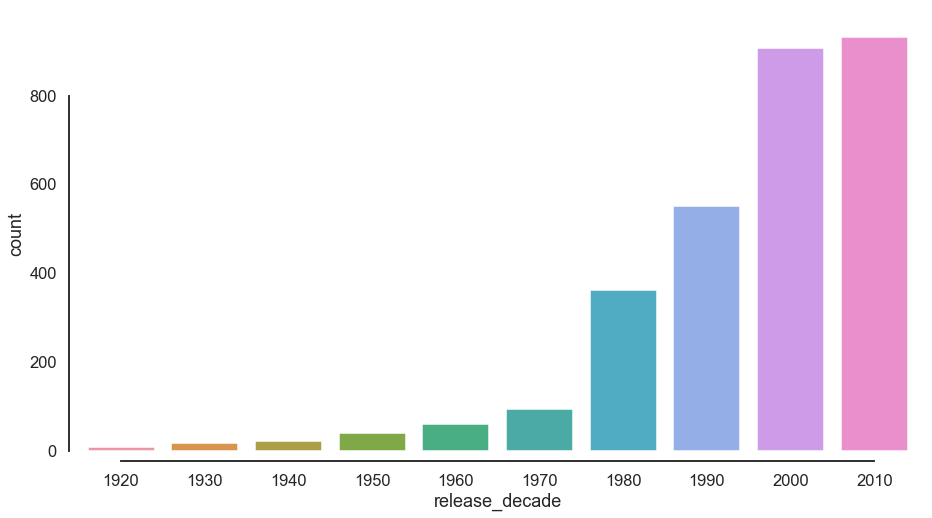

In [18]:
sns.countplot(x="release_decade", 
              data=box_office_data)

sns.despine(offset=10, 
            trim=True);

#### Does the revenue change depending on seasonal trends?

In [19]:
latest_movies = box_office_data[box_office_data.release_decade > 1970]

In [20]:
season_palette = ['#00BFFF', '#00FF7F', '#FFCC33', '#D45B12']
season_order = ['Winter', 'Spring', 'Summer', 'Autumn']

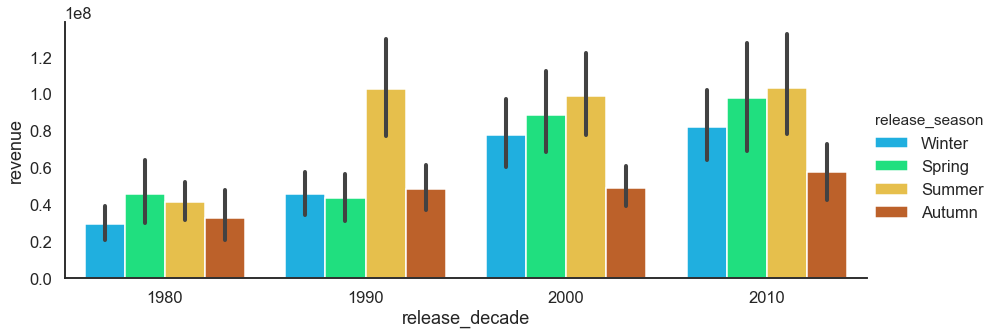

In [21]:
sns.catplot(x="release_decade", 
            y="revenue", 
            kind="bar",
            hue="release_season",
            palette=season_palette,
            hue_order=season_order,
            aspect=2.5,
            data=latest_movies);

#### Does the budget depend on gender? Has it changed throughout the last few decades?

In [22]:
latest_directors = box_office_data_crew[(box_office_data_crew.job_crew == 'Director')&(box_office_data_crew.release_decade > 1970)]

In [23]:
gender_palette = ['grey', 'gold', 'turquoise']
gender_order = ['unknown', 'female', 'male']

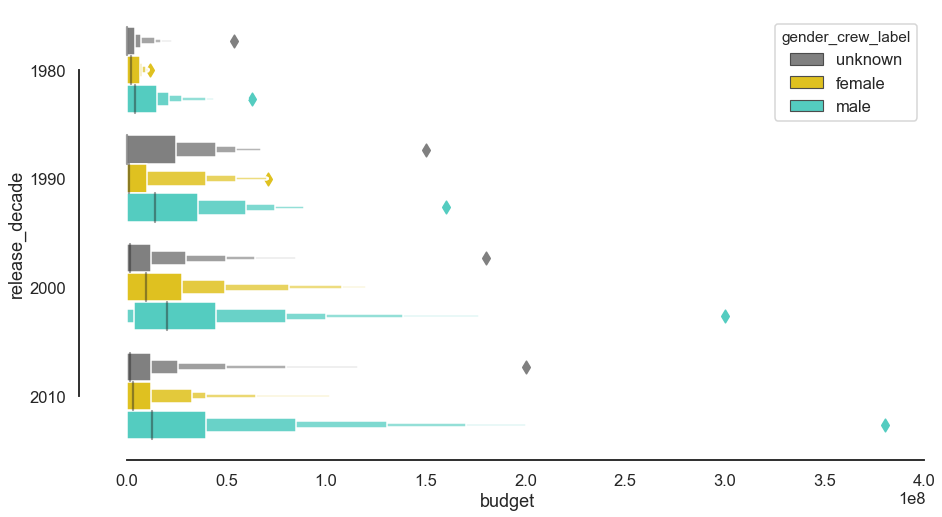

In [24]:
sns.boxenplot(y="release_decade", 
              x="budget",
              hue="gender_crew_label",
              palette=gender_palette,
              hue_order=gender_order,
              orient="h",
              data=latest_directors)
sns.despine(offset=10, 
            trim=True);

#### Are there more male actors in leading roles? Has it changed throughout the decades?

In [25]:
leading_roles = box_office_data_cast[(box_office_data_cast.gender_actor >= 0)&(box_office_data_cast.order_actor < 3)].copy()
leading_roles.order_actor += 1
leading_roles.order_actor = leading_roles.order_actor.astype(int)
leading_roles['percentage_males'] = leading_roles['gender_actor']*100

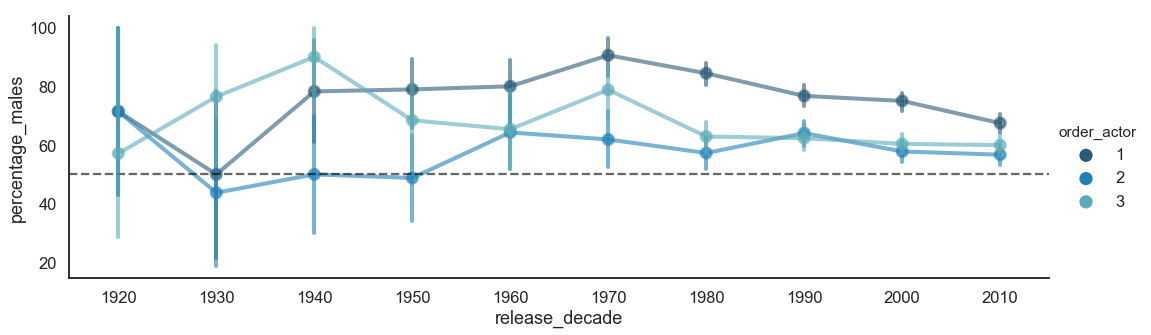

In [26]:
g = sns.catplot(x="release_decade", 
                y="percentage_males",
                hue="order_actor", 
                kind="point", 
                data=leading_roles,
                palette="YlGnBu_d",
                aspect=3);

for ax in g.axes.flat:
    ax.axhline(50, linestyle='--', color='black', alpha=.8)
    [i.set_alpha(.6) for i in ax.collections]
    [i.set_alpha(.6) for i in ax.lines]

#### How long are the most popular movies?

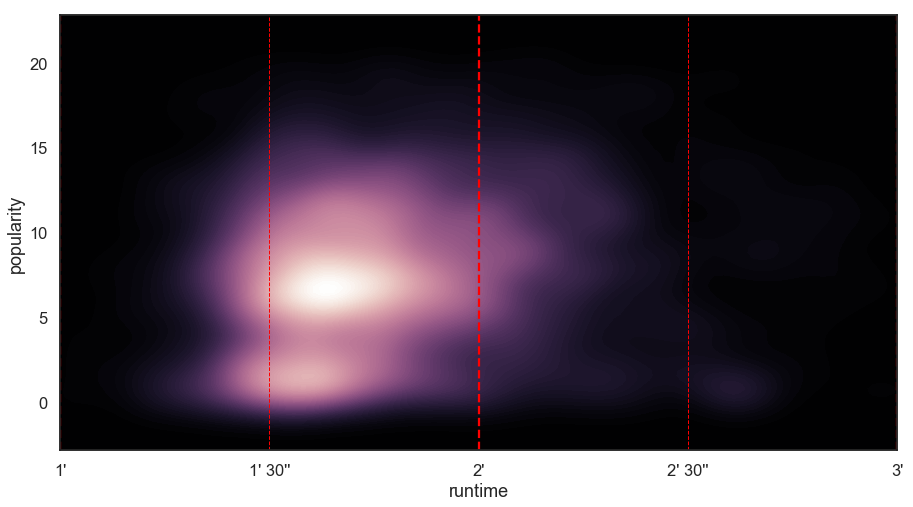

In [27]:
cond = (box_office_data.runtime >= 60)&(box_office_data.runtime <= 180)&(box_office_data.popularity <= 20)

cmap = sns.cubehelix_palette(as_cmap=True, dark=0, light=1, reverse=True)

g = sns.kdeplot(box_office_data.loc[cond, 'runtime'], 
                box_office_data.loc[cond, 'popularity'],
                cmap=cmap, 
                n_levels=100, 
                shade=True);

for hour in range(4)[1:]:
    g.axvline(60*hour, linestyle='--', color='red')
    g.axvline(60*hour+30, linestyle='--', color='red', lw=1)

g.set_xticks([30*hour + 60 for hour in range(5)])
g.set_xticklabels(["1'", "1' 30''", "2'", "2' 30''", "3'"])
g.set_xlim(60, 180);

#### Are cast numerosity, runtime and budget good predictors for the revenue of movies that made more than 10 million $?

In [28]:
cast_number = box_office_data_cast[['budget', 'runtime', 'revenue', 'id']].groupby('id').mean()

cast_number['numerosity_cast'] = box_office_data_cast.groupby('id').count()['name_actor'].values

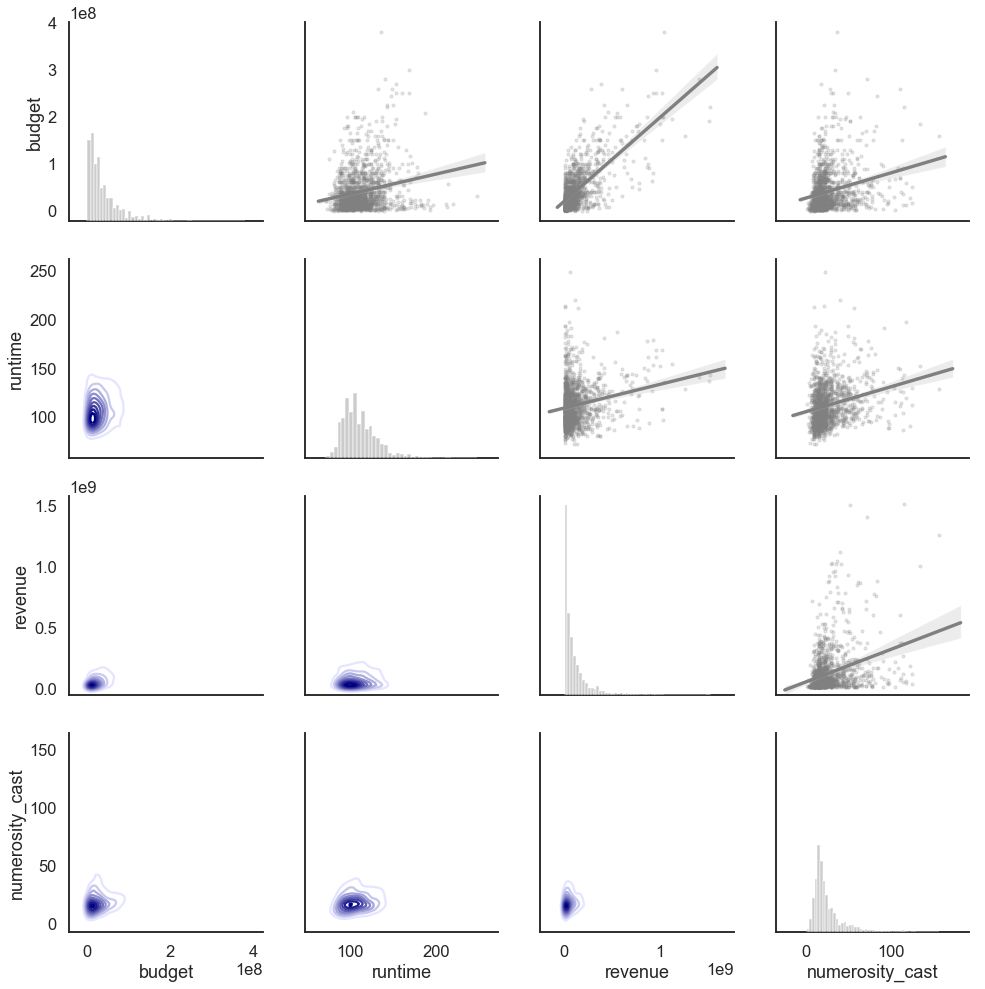

In [29]:
cond = (cast_number.budget>0)&(cast_number.revenue>1e7)&(cast_number.runtime>0)

cmap = sns.light_palette("navy", as_cmap=True)

g = sns.PairGrid(cast_number[cond], height=3.5)
g = g.map_upper(sns.regplot, scatter_kws=dict(s=10, alpha=.2), color='grey')
g = g.map_lower(sns.kdeplot, cmap=cmap)
g = g.map_diag(sns.distplot, kde=False, color='grey')

## 3. Plotly

#### Online mode...

In [30]:
import plotly
import plotly.graph_objs as go

In [31]:
first_actor = 'Judi Dench'
trace1 = go.Scatter(
    x=box_office_data_cast.loc[(box_office_data_cast.name_actor == first_actor), 'budget'],
    y=box_office_data_cast.loc[(box_office_data_cast.name_actor == first_actor), 'revenue'],
    text=box_office_data_cast.loc[(box_office_data_cast.name_actor == first_actor), 'title'],
    mode='markers',
    name=first_actor,
    marker=dict(
        color='rgba(255, 50, 50, 0.5)',
        size=box_office_data_cast.loc[(box_office_data_cast.name_actor == first_actor), 'popularity'],
        line = dict(
              color = 'rgba(0, 0, 0, 0.8)',
              width = 2
            )
    )
)

second_actor = 'Nicolas Cage'
trace2 = go.Scatter(
    x=box_office_data_cast.loc[(box_office_data_cast.name_actor == second_actor), 'budget'],
    y=box_office_data_cast.loc[(box_office_data_cast.name_actor == second_actor), 'revenue'],
    text=box_office_data_cast.loc[(box_office_data_cast.name_actor == second_actor), 'title'],
    mode='markers',
    name=second_actor,
    marker=dict(
        color='rgba(50, 255, 50, 0.5)',
        size=box_office_data_cast.loc[(box_office_data_cast.name_actor == second_actor), 'popularity'],
        line = dict(
              color = 'rgba(0, 0, 0, 0.8)',
              width = 2
            )
    )
)

third_actor = 'Halle Berry'
trace3 = go.Scatter(
    x=box_office_data_cast.loc[(box_office_data_cast.name_actor == third_actor), 'budget'],
    y=box_office_data_cast.loc[(box_office_data_cast.name_actor == third_actor), 'revenue'],
    text=box_office_data_cast.loc[(box_office_data_cast.name_actor == third_actor), 'title'],
    mode='markers',
    name=third_actor,
    marker=dict(
        color='rgba(50, 50, 255, 0.5)',
        size=box_office_data_cast.loc[(box_office_data_cast.name_actor == third_actor), 'popularity'],
        line = dict(
              color = 'rgba(0, 0, 0, 0.8)',
              width = 2
            )
    )
)

plotly.plotly.plot({
    "data": [trace1, trace2, trace3],
    "layout": go.Layout(title="Famous actors", xaxis=dict(title='Budget'), yaxis=dict(title='Revenue'))
}, auto_open=True, filename='famous_actors')

'https://plot.ly/~laura.fontanesi/4'

### Offline mode...

In [32]:
first_director = 'Sofia Coppola'
trace1 = go.Scatter(
    x=box_office_data_crew.loc[(box_office_data_crew.name_crew == first_director), 'budget'],
    y=box_office_data_crew.loc[(box_office_data_crew.name_crew == first_director), 'revenue'],
    text=box_office_data_crew.loc[(box_office_data_crew.name_crew == first_director), 'title'],
    mode='markers',
    name=first_director,
    marker=dict(
        color='rgba(255, 0, 0, 0.5)',
        size=14,
        line = dict(
              color = 'rgb(0, 0, 0)',
              width = 2
            )
    )
)

second_director = 'Spike Lee'
trace2 = go.Scatter(
    x=box_office_data_crew.loc[(box_office_data_crew.name_crew == second_director), 'budget'],
    y=box_office_data_crew.loc[(box_office_data_crew.name_crew == second_director), 'revenue'],
    text=box_office_data_crew.loc[(box_office_data_crew.name_crew == second_director), 'title'],
    mode='markers',
    name=second_director,
    marker=dict(
        color='rgba(0, 0, 255, 0.5)',
        size=14,
        line = dict(
              color = 'rgb(0, 0, 0)',
              width = 2
            )
    )
)

third_director = 'Stanley Kubrick'
trace3 = go.Scatter(
    x=box_office_data_crew.loc[(box_office_data_crew.name_crew == third_director), 'budget'],
    y=box_office_data_crew.loc[(box_office_data_crew.name_crew == third_director), 'revenue'],
    text=box_office_data_crew.loc[(box_office_data_crew.name_crew == third_director), 'title'],
    mode='markers',
    name=third_director,
    marker=dict(
        color='rgba(0, 255, 0, 0.5)',
        size=14,
        line = dict(
              color = 'rgb(0, 0, 0)',
              width = 2
            )
    )
)

plotly.offline.plot({
    "data": [trace1, trace2, trace3],
    "layout": go.Layout(title="Famous directors", xaxis=dict(title='Budget'), yaxis=dict(title='Revenue'))
}, auto_open=True, filename='famous_directors.html')

'file:///Users/laurafontanesi/Dropbox/projects/data_visualisation/famous_directors.html'

## Final step: publishing your notebook

Examples:
- [Open Science Framework](https://osf.io/bnszu/)
- [GitHub](https://github.com/laurafontanesi/women-in-data-science/blob/master/toolbox_data_science.ipynb)